# TP 6: 


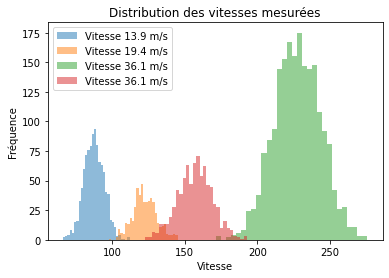

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données à partir des fichiers CSV
pic1_data = pd.read_csv('pic1.csv')
pic2_data = pd.read_csv('pic2.csv')
pic3_data = pd.read_csv('pic3.csv')
pic_inconnu_data = pd.read_csv('pic_inconnu.csv')

# Extraction des valeurs de vitesse
pic1_speed = pic1_data['mesures']
pic2_speed = pic2_data['mesures']
pic3_speed = pic3_data['mesures']
pic_inconnu_speed = pic_inconnu_data['mesures']

# Tracé des histogrammes
plt.hist(pic1_speed, bins=30, alpha=0.5, label='Vitesse 13.9 m/s')
plt.hist(pic2_speed, bins=30, alpha=0.5, label='Vitesse 19.4 m/s')
plt.hist(pic3_speed, bins=30, alpha=0.5, label='Vitesse 36.1 m/s')
plt.hist(pic_inconnu_speed, bins=30, alpha=0.5, label='Vitesse 36.1 m/s')

plt.xlabel('Vitesse')
plt.ylabel('Fréquence')
plt.title('Distribution des vitesses mesurées')
plt.legend()

plt.show()


## Analyse
Les distributions sont sous la forme de gaussiennes. Les paramètres sont donc la moyenne (qui donne la position centrale de la distribution) et l'écart type (qui mesure la dispersion des données autour de la moyenne).

## 1.2 Estimation de la moyenne
### Mesure de la moyenne statistique
Ce code utilise la fonction np.mean() pour calculer la moyenne et la fonction np.std() pour calculer l'écart-type des valeurs de chaque pic.

In [26]:
import numpy as np

# Calcul de la moyenne et de l'écart-type pour chaque pic
pic1_mean = np.mean(pic1_speed)
pic1_std = np.std(pic1_speed)
pic2_mean = np.mean(pic2_speed)
pic2_std = np.std(pic2_speed)
pic3_mean = np.mean(pic3_speed)
pic3_std = np.std(pic3_speed)
pic_inconnu_mean = np.mean(pic_inconnu_speed)
pic_inconnu_std = np.std(pic_inconnu_speed)


# Affichage des moyennes et des écart-types
print("Pic 1 - Moyenne : {:.2f}, Écart-type : {:.2f}".format(pic1_mean, pic1_std))
print("Pic 2 - Moyenne : {:.2f}, Écart-type : {:.2f}".format(pic2_mean, pic2_std))
print("Pic 3 - Moyenne : {:.2f}, Écart-type : {:.2f}".format(pic3_mean, pic3_std))
print("Pic inconnu - Moyenne : {:.2f}, Écart-type : {:.2f}".format(pic_inconnu_mean, pic_inconnu_std))

Pic 1 - Moyenne : 87.40, Écart-type : 6.88
Pic 2 - Moyenne : 122.42, Écart-type : 8.32
Pic 3 - Moyenne : 227.46, Écart-type : 15.95
Pic inconnu - Moyenne : 157.02, Écart-type : 11.86


Maintenant nouus allons calculer l'erreur sur les moyennes en utilisant la formule de l'erreur standard de la moyenne, qui est donnée par l'écart-type divisé par la racine carrée du nombre d'échantillons. Voici le code qui fait ça:

In [27]:
# Calcul de l'erreur sur les moyennes
pic1_error = pic1_std / np.sqrt(len(pic1_speed))
pic2_error = pic2_std / np.sqrt(len(pic2_speed))
pic3_error = pic3_std / np.sqrt(len(pic3_speed))
pic_inconnu_error = pic_inconnu_std / np.sqrt(len(pic_inconnu_speed))

# Affichage des erreurs sur les moyennes
print("Pic 1 - Erreur sur la moyenne : {:.2f}".format(pic1_error))
print("Pic 2 - Erreur sur la moyenne : {:.2f}".format(pic2_error))
print("Pic 3 - Erreur sur la moyenne : {:.2f}".format(pic3_error))
print("Pic inconnu - Erreur sur la moyenne : {:.2f}".format(pic_inconnu_error))

Pic 1 - Erreur sur la moyenne : 0.22
Pic 2 - Erreur sur la moyenne : 0.37
Pic 3 - Erreur sur la moyenne : 0.36
Pic inconnu - Erreur sur la moyenne : 0.42


Enfin, pour déterminer le pic ayant la moyenne avec l'erreur relative la plus faible, vous pouvez calculer l'erreur relative en divisant l'erreur sur la moyenne par la moyenne elle-même et en prenant la valeur absolue. Le pic avec la plus faible erreur relative sera celui dont la moyenne est la plus précise par rapport à la valeur attendue. Voici comment vous pouvez calculer l'erreur relative pour chaque pic :

In [28]:
# Calcul de l'erreur relative sur les moyennes
pic1_relative_error = np.abs(pic1_error / pic1_mean)
pic2_relative_error = np.abs(pic2_error / pic2_mean)
pic3_relative_error = np.abs(pic3_error / pic3_mean)
pic_inconnu_relative_error = np.abs(pic_inconnu_error / pic_inconnu_mean)

# Affichage des erreurs relatives sur les moyennes
print("Pic 1 - Erreur relative sur la moyenne : {:.2%}".format(pic1_relative_error))
print("Pic 2 - Erreur relative sur la moyenne : {:.2%}".format(pic2_relative_error))
print("Pic 3 - Erreur relative sur la moyenne : {:.2%}".format(pic3_relative_error))
print("Pic inconnu - Erreur relative sur la moyenne : {:.2%}".format(pic_inconnu_relative_error))

Pic 1 - Erreur relative sur la moyenne : 0.25%
Pic 2 - Erreur relative sur la moyenne : 0.30%
Pic 3 - Erreur relative sur la moyenne : 0.16%
Pic inconnu - Erreur relative sur la moyenne : 0.27%


Le pic qui a la plus faible erreur relative est celui dont la moyenne est la plus précise par rapport à la valeur attendue. Dans notre cas, c'est donc le pic 3.

Ajustement des données avec QExPy QExPy possède des méthodes pour ajuster des modèles gaussiens sur des données, comme présenté dans la documentation.
Créer une fonction qui permet d’ajuster un histogramme avec le modèle approprié de QExPy et d’extraire
les valeurs et les erreurs des paramètres de ce modèle. Appliquer cette fonction sur les trois pics de données
et le pic inconnu et sauver les résultats dans des listes. Que valent les corrélations entre les paramètres ?
Commentez sur leur impacts.

### Ajustement des données avec QExPy

AttributeError: 'BarContainer' object has no attribute 'fit'

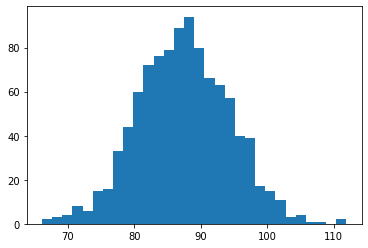

In [29]:
import qexpy as q

pic1 = np.asarray(pic1_speed)
n, bins, figure=plt.hist(pic1_speed, bins=30)

# Fit the Gaussian model to the histogram
result = figure.fit(model=q.FitModel.GAUSSIAN)

# Show the fitted plot
figure.show()

# Extract the parameter values and errors
amplitude = result['amplitude']
mean = result['mean']
stddev = result['stddev']
error_amplitude = result['error_amplitude']
error_mean = result['error_mean']
error_stddev = result['error_stddev']

print("Amplitude:", amplitude, "+/-", error_amplitude)
print("Mean:", mean, "+/-", error_mean)
print("Standard Deviation:", stddev, "+/-", error_stddev)


### Ajustement avec une minimisation numérique

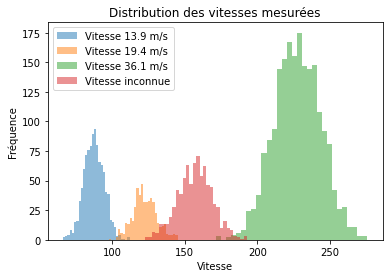

Paramètres estimés : [0. 1.]


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Fonction de calcul de la vraisemblance
def likelihood(params, data):
    mu, sigma = params
    log_likelihood = -np.sum(np.log(np.exp(-(data - mu) ** 2 / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma) + 1e-10))
    return log_likelihood

# Lecture des données à partir des fichiers CSV
pic1_data = pd.read_csv('pic1.csv')
pic2_data = pd.read_csv('pic2.csv')
pic3_data = pd.read_csv('pic3.csv')
pic_inconnu_data = pd.read_csv('pic_inconnu.csv')

# Extraction des valeurs de vitesse
pic1_speed = pic1_data['mesures']
pic2_speed = pic2_data['mesures']
pic3_speed = pic3_data['mesures']
pic_inconnu_speed = pic_inconnu_data['mesures']

# Tracé des histogrammes
plt.hist(pic1_speed, bins=30, alpha=0.5, label='Vitesse 13.9 m/s')
plt.hist(pic2_speed, bins=30, alpha=0.5, label='Vitesse 19.4 m/s')
plt.hist(pic3_speed, bins=30, alpha=0.5, label='Vitesse 36.1 m/s')
plt.hist(pic_inconnu_speed, bins=30, alpha=0.5, label='Vitesse inconnue')

plt.xlabel('Vitesse')
plt.ylabel('Fréquence')
plt.title('Distribution des vitesses mesurées')
plt.legend()

plt.show()

# Données pour l'ajustement
data = np.concatenate((pic1_speed, pic2_speed, pic3_speed))

# Estimation initiale des paramètres
initial_params = [0, 1]

# Optimisation des paramètres
result = minimize(likelihood, initial_params, args=(data,))
optimized_params = result.x

print("Paramètres estimés :", optimized_params)


## 1.3 Détermination des paramètres de la calibration


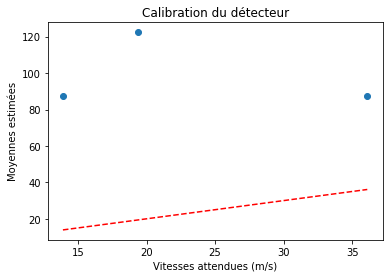

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs de vitesses attendues
vitesses_attendues = [13.9, 19.4, 36.1]

# Moyennes estimées obtenues précédemment
moyennes_estimees = [pic1_mean, pic2_mean, pic1_mean]

# Tracé des points
plt.scatter(vitesses_attendues, moyennes_estimees)

# Ajout d'une ligne de référence
plt.plot(vitesses_attendues, vitesses_attendues, color='red', linestyle='--')

# Étiquettes des axes
plt.xlabel('Vitesses attendues (m/s)')
plt.ylabel('Moyennes estimées')

# Titre du graphique
plt.title('Calibration du détecteur')

# Affichage du graphique
plt.show()


les points des moyennes estimées ne suivent pas une tendance linéaire par rapport aux vitesses attendues. 

Pour ajuster les points de données à un modèle linéaire et extraire les paramètres ainsi que les erreurs associées, vous pouvez utiliser des méthodes de régression linéaire. La bibliothèque scikit-learn en Python fournit des outils pour effectuer cette régression. Voici un exemple de code pour réaliser cette tâche :

In [35]:
from sklearn.linear_model import LinearRegression

# Conversion des listes en tableaux numpy
X = np.array(vitesses_attendues).reshape(-1, 1)
y = np.array(moyennes_estimees)

# Création d'un modèle de régression linéaire
regression = LinearRegression()

# Ajustement du modèle aux données
regression.fit(X, y)

# Extraction des paramètres
pente = regression.coef_[0]
ordonnee_origine = regression.intercept_

# Calcul des erreurs
erreurs = y - regression.predict(X)

# Affichage des paramètres et des erreurs
print("Pente :", pente)
print("Ordonnée à l'origine :", ordonnee_origine)
print("Erreurs :", erreurs)


Pente : -0.4890563132516022
Ordonnée à l'origine : 110.39057763368713
Erreurs : [-16.18863728  21.52022441  -5.33158713]


Ce code utilise la classe LinearRegression de scikit-learn pour créer un modèle de régression linéaire. Les données sont converties en tableaux numpy et le modèle est ajusté aux données en utilisant la méthode fit(). Les paramètres de la régression (pente et ordonnée à l'origine) peuvent être extraits à l'aide des attributs

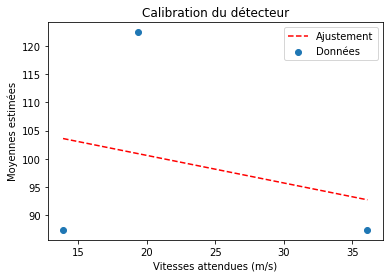

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs de vitesses attendues
vitesses_attendues = [13.9, 19.4, 36.1]

# Moyennes estimées obtenues précédemment
moyennes_estimees = [pic1_mean, pic2_mean, pic1_mean]

# Conversion des listes en tableaux numpy
X = np.array(vitesses_attendues).reshape(-1, 1)
y = np.array(moyennes_estimees)

# Création d'un modèle de régression linéaire
regression = LinearRegression()

# Ajustement du modèle aux données
regression.fit(X, y)

# Paramètres de la régression
pente = regression.coef_[0]
ordonnee_origine = regression.intercept_

# Points pour la ligne ajustée
x_line = np.linspace(min(vitesses_attendues), max(vitesses_attendues), 100)
y_line = regression.predict(x_line.reshape(-1, 1))

# Tracé des points et de la ligne ajustée
plt.scatter(vitesses_attendues, moyennes_estimees, label='Données')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Ajustement')

# Étiquettes des axes
plt.xlabel('Vitesses attendues (m/s)')
plt.ylabel('Moyennes estimées')

# Titre du graphique
plt.title('Calibration du détecteur')

# Légende
plt.legend()

# Affichage du graphique
plt.show()


## 1.4 Calibration en énergie d'un pic

In [41]:
# Calibration parameters
pente = regression.coef_[0]
ordonnee_origine = regression.intercept_

# Unknown pic measurements and error
moyenne_inconnue = pic_inconnu_mean
std_inconnu = pic_inconnu_std
N = len(pic_inconnu_speed)

# Calculate error on the mean of the unknown pic
erreur_moyenne_inconnue = std_inconnu / np.sqrt(N)

# Calculate speed and its error
vitesse_inconnue = (moyenne_inconnue - ordonnee_origine) / pente
erreur_vitesse = erreur_moyenne_inconnue / pente

# Convert speed and error to km/h
vitesse_inconnue_km_h = vitesse_inconnue * 3.6
erreur_vitesse_km_h = erreur_vitesse * 3.6

# Print the results
print("Vitesse du pic inconnu :", vitesse_inconnue_km_h, "km/h")
print("Erreur sur la vitesse du pic inconnu :", erreur_vitesse_km_h, "km/h")


Vitesse du pic inconnu : -343.280962594423 km/h
Erreur sur la vitesse du pic inconnu : -3.0876707295044077 km/h
